# Predicting Car Prices Using K-Nearest-Neighbor Regression

In this notebook, we'll be using data from the 1985 Ward's Automotive Yearbook and the K-nearest neighbors (KNN) algorithm to predict car sale prices based off their specifications.

The dataset contains the specifications of new cars and their price. The dataset can found here, at the UCI Machine Learning Repository: [Automotive Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)

The description of the columns is listed below:
- `symboling`:             Measure of safety on a scale of -3 to 3, positive numbers are more risky
- `normalized-losses`:     average loss payment per insured vehicle year
- `make`:                     the car's manufacturer 
- `fuel-type`:                diesel, gas.
- `aspiration`:               std, turbo.
- `num-of-doors`:             four, two.
- `body-style`:               hardtop, wagon, sedan, hatchback, convertible.
- `drive-wheels`:             4wd, fwd, rwd.
- `engine-location`:          front, rear.
- `wheel-base`:               continuous from 86.6 120.9 measured in inches
- `length`:                   continuous from 141.1 to 208.1 measured in inches
- `width`:                    continuous from 60.3 to 72.3 measured in inches
- `height`:                   continuous from 47.8 to 59.8 measured in inches
- `curb-weight`:              continuous from 1488 to 4066 measured in pounds
- `engine-type`:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
- `num-of-cylinders`:         eight, five, four, six, three, twelve, two.
- `engine-size`:              continuous from 61 to 326 in cubic inches
- `fuel-system`:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
- `bore`:                     the diameter of each cylinder, continuous from 2.54 to 3.94
- `stroke`:                   the distance travelled by the piston during each cycle, continuous from 2.07 to 4.17 
- `compression-ratio`:         the ratio between the volume of the cylinder and combustion chamber, continuous from 7 to 23.
- `horsepower`:               continuous from 48 to 288.
- `peak-rpm`:                 continuous from 4150 to 6600.
- `city-mpg`:                 miles per gallon while in city traffic, continuous from 13 to 49.
- `highway-mpg`:              miles per gallon on the highway, continuous from 16 to 54.
- `price`:                    in 1985 USD, continuous from 5118 to 45400.

In [1]:
import pandas as pd
import numpy as np

#dataset is missing column names, so explicitly listing them
cols=['symboling',
      'normalized_losses',
      'make',
      'fuel_type',
      'aspiration',
      'num_doors',
      'body_style',
      'drive_wheels',
      'engine_location',
      'wheel_base',
      'length',
      'width',
      'height',
      'curb_weight',
      'engine_type',
      'num_cylinders',
      'engine_size',
      'fuel_system',
      'bore',
      'stroke',
      'compression_ratio',
      'horsepower',
      'peak_rpm',
      'city_mpg',
      'highway_mpg',
      'price']

cars=pd.read_csv('~\\Downloads\\imports-85.data',header=None,names=cols)


In [2]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Determining Features and Target Columns

Before we build a model, we should figure out which columns would work best for training. We will only use the columns that contain numeric data. Since our goal is to predict price, the `price` column will be our target column.

When we look at the data types in the columns below, we find that there are columns that should contain data in a numerical type (int64, float64), but are stored as an object instead. We need to do some data cleaning before moving on.

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

## Data Cleaning

The column thats missing the most values (41 total) is the `normalized_losses` column. Below, we'll replace the missing values with the median of the column, then we'll drop the other rows that contain missing values.

In [4]:
#Normalized losses column contains '?' values
cars['normalized_losses'].value_counts().head()

?      41
161    11
91      8
150     7
104     6
Name: normalized_losses, dtype: int64

When looking at the documentation, we find that missing values are denoted by the `?` character. Below, we'll replace the `?` values with `NaN`

In [5]:
#Replacing '?' with np.nan values accross the dataframe
cars=cars.replace('?',np.nan)

In [6]:
#Locating the columns with missing values
cars.isna().sum().sort_values(ascending=False)[:7]

normalized_losses    41
price                 4
stroke                4
bore                  4
peak_rpm              2
num_doors             2
horsepower            2
dtype: int64

In [7]:
#Calculating median of normalized_losses
nl_median=cars.loc[cars['normalized_losses'].notnull(),'normalized_losses'].median()
print(nl_median)

115.0


In [8]:
#Replacing np.nan in with median value in the normalized_losses column
cars.loc[cars['normalized_losses'].isna(),'normalized_losses']=nl_median

In [9]:
#Converting data type to float
cars['normalized_losses']=cars['normalized_losses'].astype(float)

In [10]:
cars['normalized_losses'].value_counts(dropna=False).head()

115.0    44
161.0    11
91.0      8
150.0     7
104.0     6
Name: normalized_losses, dtype: int64

In [11]:
#Dropping the remaining rows that contain null values
cars=cars.dropna(axis=0)

In [12]:
cars.isnull().sum().sort_values(ascending=False).head()

symboling            0
normalized_losses    0
highway_mpg          0
city_mpg             0
peak_rpm             0
dtype: int64

### Converting data to numeric & normalizing data

To properly use the KNN algorithm, we can only use numeric data. Below we'll convert the dtypes to either `int64` or `float64`, if they contain numeric data that's currently stored as the `object` type

In [13]:
cars[['horsepower','peak_rpm','price']]=cars[['horsepower','peak_rpm','price']].astype(int)

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized_losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel_type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num_doors          193 non-null    object 
 6   body_style         193 non-null    object 
 7   drive_wheels       193 non-null    object 
 8   engine_location    193 non-null    object 
 9   wheel_base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb_weight        193 non-null    int64  
 14  engine_type        193 non-null    object 
 15  num_cylinders      193 non-null    object 
 16  engine_size        193 non

In [15]:
pd.set_option('display.max_columns', None)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Converting strings to int64
Both the `num_doors` and `num_cylinders` columns contain numeric data stored as strings. Below we'll replace the words with integers so we can use them in our model.

In [16]:
cars['num_doors'].value_counts()

four    112
two      81
Name: num_doors, dtype: int64

In [17]:
cars['num_cylinders'].value_counts()

four      153
six        24
five       10
eight       4
twelve      1
three       1
Name: num_cylinders, dtype: int64

In [18]:
num_map={'one':1,
        'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'eight':8,
        'twelve':12}
cars[['num_doors','num_cylinders']]=cars[['num_doors','num_cylinders']].applymap(lambda x: num_map[x])
cars[['num_doors','num_cylinders']].head()

,num_doors,num_cylinders
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized_losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel_type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num_doors          193 non-null    int64  
 6   body_style         193 non-null    object 
 7   drive_wheels       193 non-null    object 
 8   engine_location    193 non-null    object 
 9   wheel_base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb_weight        193 non-null    int64  
 14  engine_type        193 non-null    object 
 15  num_cylinders      193 non-null    int64  
 16  engine_size        193 non

In [20]:
#Creating a dataframe with only numeric columns
cars['price']=cars['price'].astype(int)
cars_clean=cars.select_dtypes(include=np.number).copy()
cars_clean.describe()

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,120.051813,3.160622,98.923834,174.326425,65.893782,53.869948,2561.507772,4.419689,128.124352,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,32.425675,0.989583,6.152409,12.478593,2.137795,2.394770,526.700026,1.023182,41.590452,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,98.000000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,4.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,4.000000,146.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = cars_clean['price']
cars_scaled = (cars_clean - cars_clean.min())/(cars_clean.max() - cars_clean.min())
cars_scaled['price'] = price_col

In [22]:
cars_scaled.describe()

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.559585,0.288229,0.580311,0.359295,0.495917,0.478101,0.505829,0.416411,0.157743,0.253299,0.196477,0.259261,0.387649,0.342401,0.389146,13285.025907
std,0.247116,0.169768,0.494792,0.179371,0.186248,0.182718,0.199564,0.204306,0.113687,0.156945,0.248593,0.177384,0.191304,0.177440,0.179392,8089.082886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.157068,0.000000,0.230321,0.376119,0.324786,0.350000,0.254849,0.111111,0.139623,0.093750,0.102804,0.265306,0.166667,0.236842,7738.000000
50%,0.600000,0.261780,1.000000,0.303207,0.479104,0.435897,0.525000,0.359193,0.111111,0.222642,0.125000,0.219626,0.387755,0.333333,0.368421,10245.000000
75%,0.800000,0.361257,1.000000,0.460641,0.649254,0.564103,0.658333,0.567882,0.111111,0.320755,0.150000,0.317757,0.551020,0.472222,0.473684,16515.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


## Building K-Nearest Neighbors Models

Now that we have our data cleaned and scaled appropriately, we can begin building our regression model. We'll build a few; a Univariate Model, which uses only one feature to predict price, and a Multivariate Model, which uses multiple features to predict price. We'll then try each model with multiple k values to determine the k value with the lowest root mean squared error (rmse). Our goal is to find which columns and k values result in the most accurate predictions.

### Univariate Model

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, data):
    knn=KNeighborsRegressor()
    np.random.seed(1)
    
    #Shuffle the data
    shuffled_index=np.random.permutation(data.index)
    shuffled_data=data.reindex(shuffled_index)
    
    #Splitting data into train/test segments
    cutoff_index=int(len(shuffled_data)*.5)
    train_data=shuffled_data.iloc[:cutoff_index]
    test_data=shuffled_data.iloc[cutoff_index:]
    
    #fitting the model to training data
    knn.fit(train_data[[train_col]],train_data[target_col])
    
    #calculating prediction and returning root-mean-squared error
    predictions=knn.predict(test_data[[train_col]])
    mse=mean_squared_error(test_data[target_col],predictions)
    return np.sqrt(mse)

In [24]:
#Testing univariate model using the 'city_mpg' column
knn_train_test('city_mpg','price',cars_scaled)

4453.397655306413

In [25]:
#price is our target column, all other columns are used for training
train_cols=cars_scaled.columns.drop('price')

In [26]:
rmse={}

#Iterating through the training columns, compiling dictionary containing rmse values
for col in train_cols:
    rmse[col]=knn_train_test(col, 'price', cars_scaled)

rmse=pd.Series(rmse)
print(rmse.sort_values())

engine_size          3247.858492
curb_weight          4277.090667
city_mpg             4453.397655
highway_mpg          4457.947353
width                4586.631863
horsepower           4928.543248
num_cylinders        5615.498645
length               5823.219231
wheel_base           5879.632781
compression_ratio    6654.971495
normalized_losses    8087.816916
peak_rpm             8243.362449
height               8471.473079
num_doors            9724.044937
symboling            9969.442423
dtype: float64


Since `engine_size` has the lowest error value when using the default k-value univariate model, it is the strongest indicator of car price.

### Updating Univariate Model to Include Multiple k values

Next, we'll run our model again, but this time, we'll create a for loop inside of the function to compute error values using different k-values

In [27]:
def knn_train_test(train_col, target_col, data):    
    np.random.seed(1)
    
    #Shuffle the data
    shuffled_index=np.random.permutation(data.index)
    shuffled_data=data.reindex(shuffled_index)
    
    #Splitting data into train/test segments
    cutoff_index=int(len(shuffled_data)*.5)
    train_data=shuffled_data.iloc[:cutoff_index]
    test_data=shuffled_data.iloc[cutoff_index:]
    
    #providing a spread of 5 different k values
    k_values=[1,3,5,7,9]
    rmses={}
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        
        #fitting the model to training data
        knn.fit(train_data[[train_col]],train_data[target_col])

        #calculating prediction and returning root-mean-squared error
        predictions=knn.predict(test_data[[train_col]])
        mse=mean_squared_error(test_data[target_col],predictions)
        rmses[k]=np.sqrt(mse)
    return rmses

In [28]:
k_col_rmse={}

for col in train_cols:
    k_col_rmse[col]=knn_train_test(col, 'price', cars_scaled)

In [29]:
#Converting dictionary to dataframe
k_error_data=pd.DataFrame(k_col_rmse)
k_error_data=k_error_data.transpose().sort_values(by=1, ascending=False)

#Columns represent different k-values
k_error_data

,1,3,5,7,9
num_doors,20364.033248,13006.984283,9724.044937,9051.907498,8945.791131
symboling,15107.116264,10275.875524,9969.442423,9541.604233,8865.652751
height,10889.539461,8567.789618,8471.473079,8137.528221,8215.912288
compression_ratio,7838.400373,7012.187434,6654.971495,6533.591538,6776.214585
normalized_losses,7813.919391,7765.191111,8087.816916,8089.732998,8014.211284
peak_rpm,7514.818290,7422.196486,8243.362449,7920.649600,7923.688119
num_cylinders,6886.336993,5646.719551,5615.498645,5936.366056,6030.995271
wheel_base,6332.159353,5691.155680,5879.632781,5933.800412,6007.526484
length,6258.164658,5764.587398,5823.219231,5855.722065,5901.629001
city_mpg,5634.707013,4295.143746,4453.397655,4308.397540,4701.149969


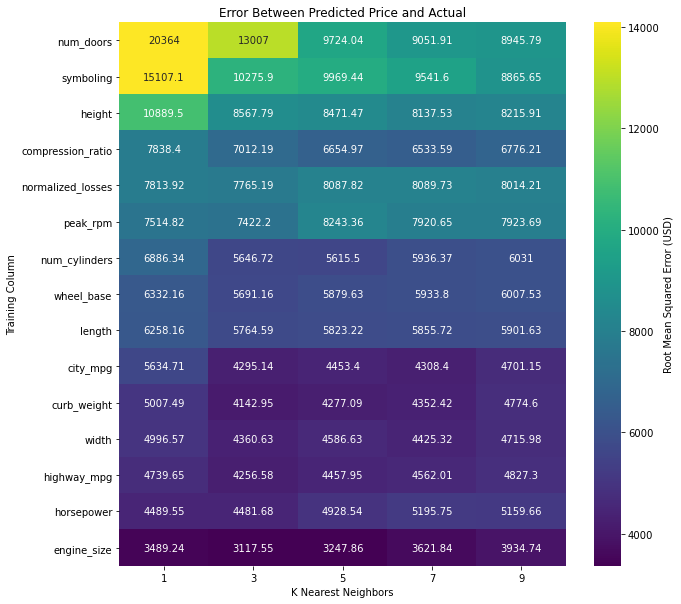

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.figure(figsize=(10,10))
sns.heatmap(k_error_data, cmap="viridis", annot=True, fmt='g',
            cbar_kws={'label':'Root Mean Squared Error (USD)'},robust=True)
plt.ylabel('Training Column')
plt.xlabel('K Nearest Neighbors')
plt.title('Error Between Predicted Price and Actual')
plt.show()

The figure above is a heatmap; at a given column and k-value, the error value is represented in the color scale. More accurate features are purple, while inaccurate features are yellow. Remember we are only using a single variable to predict price in this model.

In [31]:
#Creating a ranked list of most accurate features
best_features=k_error_data.copy()

#We'll calculate rank based on the sum of all rmse values across each k
best_features['Total']=best_features.sum(axis=1)
best_features=best_features.sort_values(by='Total')

#isolating only the feature names
top_features=[x for x in best_features.index]
top_features

['engine_size',
 'curb_weight',
 'highway_mpg',
 'width',
 'city_mpg',
 'horsepower',
 'length',
 'wheel_base',
 'num_cylinders',
 'compression_ratio',
 'peak_rpm',
 'normalized_losses',
 'height',
 'symboling',
 'num_doors']

## Multivariate Model

Now that we have an idea of how the univariate model will behave, let's build a model that uses multiple features to predict price. Below we edit our function to use the default k-value, but multiple columns for training.

Above we determined some of the best features for training, which include:
- `engine_size` 
- `curb_weight`
- `highway_mpg`
- `width`
- `city_mpg`

In [32]:
def knn_train_test(train_cols, target_col, data):    
    np.random.seed(1)
    
    #Shuffle the data
    shuffled_index=np.random.permutation(data.index)
    shuffled_data=data.reindex(shuffled_index)
    
    #Splitting data into train/test segments
    cutoff_index=int(len(shuffled_data)*.5)
    train_data=shuffled_data.iloc[:cutoff_index]
    test_data=shuffled_data.iloc[cutoff_index:]
    
    knn=KNeighborsRegressor()
    knn.fit(train_data[train_cols], train_data[target_col])
    predictions=knn.predict(test_data[train_cols])
    mse=mean_squared_error(predictions, test_data[target_col])
    rmse=np.sqrt(mse)
    return rmse

Below we'll calculate the rmse values using the different numbers of the top features as training, from 2 to 5.

In [33]:
#Create an empty dictionary that stores output
m_var_error={}

#Iterating through the 'top_features'
#the list is ordered, so it will use the two best features, then the three best features, etc
for i in range(2,6):
    m_var_error[i]=knn_train_test(top_features[:i],'price',cars_scaled)

#converting dictionary to pd.Series
mv_rmses=pd.Series(m_var_error)
mv_rmses.sort_values(inplace=True)
mv_rmses

2    3379.099222
3    3627.309082
5    3638.898915
4    3729.445154
dtype: float64

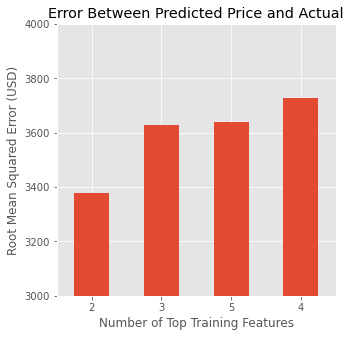

In [34]:
#Graphing results
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
mv_rmses.plot(kind='bar')
plt.ylabel('Root Mean Squared Error (USD)')
plt.ylim([3000, 4000])
plt.xlabel('Number of Top Training Features')
plt.xticks(rotation=0)
plt.title('Error Between Predicted Price and Actual')
plt.show()

Using the default k value (5), the most accurate model used two of the top features for training. The models that used both 3 and 5 of the top features produced similar results. We observed the largest error value using the top 4 features.

### Hyperparameter Tuning

Now that we have an idea of the number of best features to include in our model, let's test each of the best 3 models using different k values to find the optimal k value to use for predictions.

In [35]:
top_3_models=[x for x in mv_rmses.index[:3]]
top_3_models

[2, 3, 5]

In [36]:
#redefining our train/test function to iterate through multiple k values
def knn_train_test(train_cols, target_col, data, k):    
    np.random.seed(1)
    
    #Shuffle the data
    shuffled_index=np.random.permutation(data.index)
    shuffled_data=data.reindex(shuffled_index)
    
    #Splitting data into train/test segments
    cutoff_index=int(len(shuffled_data)*.5)
    train_data=shuffled_data.iloc[:cutoff_index]
    test_data=shuffled_data.iloc[cutoff_index:]
    
    rmses={}
    for n in range(1,k+1):
        knn=KNeighborsRegressor(n_neighbors=n)
        knn.fit(train_data[train_cols], train_data[target_col])
        predictions=knn.predict(test_data[train_cols])
        mse=mean_squared_error(predictions, test_data[target_col])
        rmses[n]=np.sqrt(mse)
    return rmses

In [37]:
#Transferring results to a DataFrame 
k_test={}

for i in top_3_models:
    k_test[i]=knn_train_test(top_features[:i], 'price', cars_scaled, 25)
    
tuning=pd.DataFrame(k_test)
tuning.rename(columns={2:'2 feature model',
                      3:'3 feature model',
                      5:'5 feature model'}, inplace=True)
tuning.head()

,2 feature model,3 feature model,5 feature model
1,2683.284145,2815.290469,2912.584037
2,2819.239204,2669.881544,3112.726192
3,2973.536777,3122.480953,3294.358710
4,3145.211439,3239.653951,3564.253692
5,3379.099222,3627.309082,3638.898915


<Figure size 720x720 with 0 Axes>

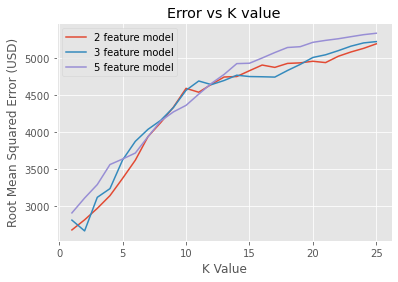

In [38]:
#plotting results as a line graph
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
tuning.plot(kind='line')
plt.ylabel('Root Mean Squared Error (USD)')
plt.xlabel('K Value')
plt.title('Error vs K value')
plt.show()

After running our test, we find that these are the most accurate models:
- 3 feature model using a k value of 2
- 2 feature model using a k value of 1
- 3 feature model using a k value of 1

Before we conclude this project, let's use our most accurate model to predict the price of a modern car.

## Applying our Best Model

Since our best model looks at the three 3 features, let's see what they are:
- `engine_size`
- `curb_weight`
- `highway_mpg`

Let's use our model predict the price of a 2021 Toyota Camery. It's specifications are:
- `engine_size` - 152 cubic inches
- `curb_weight` - 3310 pounds
- `highway_mpg` - 39 miles per gallon
- `price` - 25,045 USD (Based off MRSP)

We'll first need to normalize our values in the context of our dataset, done below

In [39]:
def norm(x, feature):
        return (x-cars_clean[feature].min())/(cars_clean[feature].max()-cars_clean[feature].min())

tc={}
for x, feature in zip([152, 3310, 39], ['engine_size','curb_weight','highway_mpg']):
    tc[feature]=norm(x, feature)
tc=pd.Series(tc, index=tc.keys())
tc['price']=25045
tc

engine_size        0.343396
curb_weight        0.706749
highway_mpg        0.605263
price          25045.000000
dtype: float64

Now that we have data for our 2021 Toyota Camery, we'll build a function that will predict its price. 

It's important to note that, since our training data was collected in 1985, and the price of cars has gone up due to inflation, we'll adjust our prediction based off the [Consumer Price Index of new cars](https://www.in2013dollars.com/New-cars/price-inflation/1985). The Bureau of Labor Statistics estimates that the prices of new cars has increased by 43.29% since 1985. Our function will adjust the prediction price accordingly.

In [40]:
def knn_train_predict(train_cols, target_col, data, k):    
    np.random.seed(1)
    knn=KNeighborsRegressor(n_neighbors=k)
    #Shuffle the data
    shuffled_index=np.random.permutation(data.index)
    shuffled_data=data.reindex(shuffled_index)
    
    #Splitting data into train/test segments
    #Since we won't need test data, we can train the model using all of the data
    cutoff_index=int(len(shuffled_data))
    train_data=shuffled_data.iloc[:cutoff_index]
    knn.fit(train_data[train_cols], train_data[target_col])
    print('The MSRP of a 2021 Toyota Camery: 25045 USD')
    prediction=knn.predict([tc[train_cols]])
    print('Predicted price of a 2021 Toyota Camery (in 1985 USD):',np.round(prediction[0],2),'USD')
    #inflation adjustment
    prediction_adjusted=prediction*1.4329
    print('Adjusted prediction, accounting for inflation (43.29% increase since 1985):',np.round(prediction_adjusted[0],2),'USD')
    error=abs(tc['price']-prediction_adjusted)
    print('Error is :',np.round(error[0],2),'USD or',np.round((100*(error[0]/tc['price'])),3),'%')

In [41]:
train_cols=['engine_size','curb_weight','highway_mpg']
target_col='price'

knn_train_predict(train_cols, target_col, cars_scaled, 2)

The MSRP of a 2021 Toyota Camery: 25045 USD
Predicted price of a 2021 Toyota Camery (in 1985 USD): 17425.0 USD
Adjusted prediction, accounting for inflation (43.29% increase since 1985): 24968.28 USD
Error is : 76.72 USD or 0.306 %


## Conclusion

Through the testing of different models of our dataset we determined that: 
- The strongest indicators of a new car's price are: engine size ([displacement](https://en.wikipedia.org/wiki/Engine_displacement)), car weight (lbs),  and highway gas milage. On the contrary, other specifications are poor indicators of car price such as : number of doors, and symboling (measurement of safety).
- Our model is most accurate when using 2 nearest-neighbors
- Our model can predict the price of a 2021 Toyota Camery with 99% accuracy

Although our real world test was accurate, there are definitely ways we could improve our model:
- More Data: After cleaning, we had only 193 cars, accuracy would likely increase if we were working with a larger dataset. As a result, the error values for using a larger k value would likely go down.
- More Recent Data: Our dataset is based off cars from 1985. Today, cars have new features and technology (Hybrid technology, GPS, Self-driving) that are not evaluated by our model. There may be better indicators of car prices today.
- Accounting for Qualitative Features: We only included numeric data in our training in predictions. Other qualitative data may be useful in predicting price such as make or body style.